In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as units
#import seaborn as sns


%matplotlib inline

In [401]:
%load_ext autoreload
%autoreload 2
from getGaiaData import GaiaClusterMembers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [402]:
# M67 = GaiaClusterMembers(295.3250, 40.19, 1)
# M67.verbose = 1
# M67.getData()


In [403]:
# M67.saveDataToFile('M67data.ecsv')

In [404]:
data = 'M67data.ecsv'

In [405]:
originalGaia = pd.read_csv(data, sep='\s+', skiprows=180)

In [406]:
originalGaia

,source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,...,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error
0,2076238047602280192,294.966500,39.361183,-2.999210,-3.818512,NaN,19.883455,284.23004,20.299744,15.213822,...,0.031497,NaN,NaN,NaN,NaN,NaN,NaN,0.004710,0.071420,0.041885
1,2076248699120608640,294.752671,39.356005,-0.671946,-1.635737,NaN,20.538590,152.52092,21.097216,8.546000,...,0.108386,NaN,NaN,NaN,NaN,NaN,NaN,0.007633,0.127077,0.093990
2,2076253543843879296,294.701165,39.488968,-2.033566,-2.938065,NaN,19.750128,294.89368,19.937466,20.490114,...,0.031644,NaN,NaN,NaN,NaN,NaN,NaN,0.004599,0.053062,0.037670
3,2076266566193173888,295.252366,39.571041,-2.409607,-5.720345,NaN,16.869741,950.54517,17.254961,171.670530,...,0.004279,15.580,0.048,15.259,0.078,15.087,0.146,0.002983,0.006913,0.006297
4,2076274121030080768,295.448969,39.692846,-4.736110,-5.343965,NaN,19.319450,374.44820,19.861364,25.261162,...,0.019191,NaN,NaN,NaN,NaN,NaN,NaN,0.004000,0.043071,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255923,2073342410715449216,296.619153,40.114228,-2.470092,-7.121201,NaN,18.443281,745.86835,19.030287,41.412790,...,0.009127,NaN,NaN,NaN,NaN,NaN,NaN,0.003116,0.026365,0.010569
255924,2073342410715902208,296.618910,40.096214,-4.800062,-5.685936,NaN,17.066862,1546.42070,17.517480,203.251630,...,0.004654,15.637,0.095,15.424,0.130,14.519,NaN,0.002843,0.006027,0.005834
255925,2073342415017252608,296.615687,40.099373,-4.737668,-3.593590,NaN,20.105390,243.10023,21.297737,9.527926,...,0.014072,NaN,NaN,NaN,NaN,NaN,NaN,0.005248,0.113987,0.027227
255926,2073342415017260160,296.617120,40.099566,-0.237770,-3.299526,NaN,20.463180,152.51569,20.884764,8.850124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007633,0.122712,0.121465


In [407]:
sm = "/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/result/cluster.massSamples"
mem = "/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/result/cluster.membership"
ph = "/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/NGC6819.phot"

In [408]:
phot = pd.read_csv(ph, sep='\s+')
phot['m1Mean'] = -1
phot['m1Std'] = -1
phot['m2Mean'] = -1
phot['m2Std'] = -1
phot['qMean'] = -1
phot['qStd'] = -1
phot['memMean'] = -1
phot['memStd'] = -1
phot['member'] = False
phot['binary'] = False
phot


,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,10010400015,9.9643,11.6368,8.7188,12.0640,11.9650,10.1610,9.0880,8.5260,6.758,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1,10618000016,10.0908,11.4559,8.9425,13.2814,10.9032,9.0598,8.5864,8.8477,7.240,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2,10719500017,10.1428,11.4292,9.0287,99.9000,99.9000,99.9000,99.9000,99.9000,7.356,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
3,11321600029,10.9064,11.7692,10.0000,99.9000,99.9000,99.9000,99.9000,99.9000,8.723,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
4,10007800034,11.0790,11.9665,10.1455,99.9000,99.9000,99.9000,99.9000,99.9000,8.819,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,10639026771,20.4824,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1906,10095627116,20.5168,99.9000,99.9000,21.0998,99.9000,20.2313,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1907,10130227255,20.5313,99.9000,99.9000,99.9000,20.5410,20.3388,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1908,10572927462,20.5560,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,16.851,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False


In [409]:
newGaia = originalGaia[['phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag','ra','dec']].copy()
newGaia

,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ra,dec
0,19.883455,20.299744,19.252030,294.966500,39.361183
1,20.538590,21.097216,20.259325,294.752671,39.356005
2,19.750128,19.937466,19.062998,294.701165,39.488968
3,16.869741,17.254961,16.234373,295.252366,39.571041
4,19.319450,19.861364,18.694342,295.448969,39.692846
...,...,...,...,...,...
255923,18.443281,19.030287,17.725218,296.619153,40.114228
255924,17.066862,17.517480,16.453545,296.618910,40.096214
255925,20.105390,21.297737,19.029236,296.615687,40.099373
255926,20.463180,20.884764,19.953474,296.617120,40.099566


In [410]:
newGaia = newGaia.rename(columns={'phot_g_mean_mag': 'G', 'phot_bp_mean_mag': 'G_BP', 'phot_rp_mean_mag': 'G_RP'})
newGaia


,G,G_BP,G_RP,ra,dec
0,19.883455,20.299744,19.252030,294.966500,39.361183
1,20.538590,21.097216,20.259325,294.752671,39.356005
2,19.750128,19.937466,19.062998,294.701165,39.488968
3,16.869741,17.254961,16.234373,295.252366,39.571041
4,19.319450,19.861364,18.694342,295.448969,39.692846
...,...,...,...,...,...
255923,18.443281,19.030287,17.725218,296.619153,40.114228
255924,17.066862,17.517480,16.453545,296.618910,40.096214
255925,20.105390,21.297737,19.029236,296.615687,40.099373
255926,20.463180,20.884764,19.953474,296.617120,40.099566


In [411]:
# should we exclude all the rows with negative sig values?
# no, we should probably include them since they are in the cluster
#
#phot = phot.loc[(phot['sigg_ps'] > 0) & (phot['sigr_ps'] > 0) & (phot['sigi_ps'] > 0) \
                # & (phot['sigz_ps'] > 0) & (phot['sigy_ps'] > 0)]
# phot

In [412]:
# get the names for the masses
massesNames = np.loadtxt(sm,max_rows = 1, dtype=str)
massesNames = np.char.replace(massesNames,'mass','')
massesNames = np.char.replace(massesNames,'ratio','')
massesNames = np.char.replace(massesNames,'"','')
massesNames = (massesNames[massesNames != ''])
massesNames


array(['10010400015', '10010400015', '10618000016', ..., '10130227255',
       '10572927462', '10572927462'], dtype='<U11')

In [413]:
# get the masses
masses = np.loadtxt(sm,skiprows=1)
print(masses.shape)
print(masses.shape[1]/2.)
print(type(masses))

(9341, 3818)
1909.0
<class 'numpy.ndarray'>


In [414]:
# get the memberships 
membership = np.loadtxt(mem)
print(membership.shape)

(9341, 1909)


In [415]:
phot

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,10010400015,9.9643,11.6368,8.7188,12.0640,11.9650,10.1610,9.0880,8.5260,6.758,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1,10618000016,10.0908,11.4559,8.9425,13.2814,10.9032,9.0598,8.5864,8.8477,7.240,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2,10719500017,10.1428,11.4292,9.0287,99.9000,99.9000,99.9000,99.9000,99.9000,7.356,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
3,11321600029,10.9064,11.7692,10.0000,99.9000,99.9000,99.9000,99.9000,99.9000,8.723,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
4,10007800034,11.0790,11.9665,10.1455,99.9000,99.9000,99.9000,99.9000,99.9000,8.819,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,10639026771,20.4824,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1906,10095627116,20.5168,99.9000,99.9000,21.0998,99.9000,20.2313,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1907,10130227255,20.5313,99.9000,99.9000,99.9000,20.5410,20.3388,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1908,10572927462,20.5560,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,16.851,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False


In [416]:
#calculate the binary fraction
nBinary = 0
nCluster = 0
count = 0
for i in range(0,masses.shape[1],2):
    # get the row in the phot file
    iden = int(massesNames[i])
    row = phot.loc[(phot['id'] == iden)]
    #print(row['id'])
    
    # get the column in the membership file
    
    imem = int((i/2))
    memArr = membership[:,imem]
    memMean = np.mean(memArr)
    memStd = np.std(memArr)
    
     #add to the phot df
    phot.at[row.index[0], 'memMean'] = memMean
    phot.at[row.index[0], 'memStd'] = memStd
    
    if (memMean - 3*memStd > 0):
        phot.at[row.index[0], 'member'] = True

        nCluster += 1
        
        # get the masses
        m1Arr = masses[:,i]
        qArr = masses[:,(i + 1)]
        m2Arr = m1Arr*qArr
        m2Mean = np.mean(m2Arr)
        m1Mean = np.mean(m1Arr)
        m2Std = np.std(m2Arr)
        qMean = np.mean(qArr)
        qStd = np.std(qArr)

        
        # add to the phot df masses (to do)
        phot.at[row.index[0], 'qMean'] = qMean
        phot.at[row.index[0], 'qStd'] = qStd
        phot.at[row.index[0], 'm1Mean'] = m1Mean
        phot.at[row.index[0], 'm2Mean'] = m2Mean
        
    
        if (m2Mean - 3*m2Std > 0):
            nBinary += 1
            phot.at[row.index[0], 'binary'] = True
            
        if (qMean>=0.5):
            count += 1
            
    #print(m1Arr)   
print(nBinary, nCluster, nBinary/nCluster, np.sqrt(nBinary)/nCluster,count,count/nCluster,np.sqrt(count)/nCluster )

471 1726 0.2728852838933951 0.01257389015887063 409 0.2369640787949015 0.011717119592211288


In [417]:
phot2 = phot.loc[(phot['member']) & (phot['binary']== False)]
phot2

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,10010400015,9.9643,11.6368,8.7188,12.064,11.965,10.161,9.0880,8.5260,6.758,...,1.575797,-1,0.064293,-1,0.040801,0.062545,1.000000,0.000000,True,False
2,10719500017,10.1428,11.4292,9.0287,99.900,99.900,99.900,99.9000,99.9000,7.356,...,1.631634,-1,0.052816,-1,0.033352,0.059547,0.999572,0.020689,True,False
3,11321600029,10.9064,11.7692,10.0000,99.900,99.900,99.900,99.9000,99.9000,8.723,...,1.614258,-1,0.056355,-1,0.035140,0.084305,0.999786,0.014602,True,False
4,10007800034,11.0790,11.9665,10.1455,99.900,99.900,99.900,99.9000,99.9000,8.819,...,1.573799,-1,0.164764,-1,0.104692,0.149630,1.000000,0.000000,True,False
5,10556700036,11.0880,11.9191,10.2012,99.900,99.900,99.900,99.9000,99.9000,8.942,...,1.624612,-1,0.068404,-1,0.042658,0.094272,0.999786,0.014631,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,10288517831,19.5078,99.9000,99.9000,99.900,99.900,99.900,99.9000,99.9000,99.900,...,0.657001,-1,0.390229,-1,0.605491,0.327598,1.000000,0.000000,True,False
1884,10051519131,19.6648,99.9000,99.9000,99.900,99.900,99.900,99.9000,99.9000,99.900,...,0.640917,-1,0.388704,-1,0.618450,0.326904,1.000000,0.000000,True,False
1885,11075819339,19.6911,99.9000,99.9000,99.900,99.900,99.900,99.9000,99.9000,99.900,...,0.638693,-1,0.384495,-1,0.614079,0.326876,1.000000,0.000000,True,False
1886,11356519398,19.6979,99.9000,99.9000,99.900,99.900,99.900,99.9000,99.9000,99.900,...,0.638325,-1,0.383746,-1,0.613077,0.326024,1.000000,0.000000,True,False


In [418]:
phot2['binary'].unique()

array([False])

In [419]:
photcut = phot2.loc[(phot2['G'] > 15) & (phot2['G']<18.5)]

In [420]:
photBinary = phot.loc[phot['binary']]
photBinary

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
18,10079200118,12.5085,13.0806,11.7925,99.9000,99.9000,99.9000,99.9000,99.9000,10.843,...,1.587656,-1,1.543199,-1,0.972027,0.052500,0.995932,6.365169e-02,True,True
19,10014000119,12.5173,13.1115,11.7863,13.3066,12.6870,12.2810,12.0270,11.9090,10.790,...,1.595815,-1,1.452335,-1,0.910220,0.182120,0.944925,2.280457e-01,True,True
20,10291800122,12.5621,13.1809,11.8130,13.3745,12.7150,12.3100,12.0640,11.9320,10.804,...,1.598595,-1,1.277282,-1,0.799065,0.166017,0.999998,3.616864e-05,True,True
21,10320700125,12.5894,13.1961,11.8481,13.3969,12.7100,12.3140,12.0760,11.9540,10.844,...,1.594874,-1,1.401906,-1,0.879090,0.047201,0.998533,3.405517e-02,True,True
22,10276600132,12.6390,13.2478,11.8866,13.3457,13.0830,12.5690,12.2340,12.0017,10.867,...,1.597176,-1,1.316464,-1,0.824260,0.047268,0.999882,2.579837e-03,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,10588715865,19.2640,19.9550,18.4009,20.2450,19.1709,18.7523,99.9000,18.1414,99.900,...,0.705049,-1,0.343375,-1,0.487273,0.092093,1.000000,0.000000e+00,True,True
1879,11196416068,19.2877,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,16.319,...,0.641565,-1,0.624274,-1,0.973296,0.023495,0.998745,1.297811e-02,True,True
1880,10006017074,19.4167,99.9000,99.9000,99.9000,99.9000,18.6213,99.9000,99.9000,99.900,...,0.635973,-1,0.619667,-1,0.974574,0.021689,1.000000,0.000000e+00,True,True
1883,11717518632,19.6066,99.9000,99.9000,99.9000,19.6921,18.1839,18.7557,18.6017,99.900,...,0.655270,-1,0.448548,-1,0.686959,0.124208,1.000000,5.665158e-08,True,True


In [421]:
photBinarycut = photBinary.loc[(photBinary['G'] > 15) & (photBinary['G']<18.5)]
photBinarycut

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
201,10171101052,15.0004,15.3366,14.4768,15.4123,14.9992,14.8574,14.8132,14.7517,13.882,...,1.362035,-1,1.016168,-1,0.750597,0.139230,0.999789,1.993038e-03,True,True
205,10067001058,15.0078,15.3503,14.4938,15.4200,15.0200,14.8864,14.8406,14.7923,13.881,...,1.337221,-1,1.042583,-1,0.786438,0.184020,0.999972,3.749322e-04,True,True
208,10336401061,15.0119,15.3666,14.4824,15.4348,15.0113,14.8612,14.8076,14.7487,13.891,...,1.377445,-1,0.980353,-1,0.713797,0.097490,0.994872,3.006042e-02,True,True
211,10099101072,15.0233,15.3364,14.5045,15.3959,15.0066,14.8861,14.8530,14.8054,13.833,...,1.348140,-1,0.991563,-1,0.743796,0.203787,0.998324,1.217436e-02,True,True
212,10001001074,15.0246,15.3575,14.5142,15.4215,15.0348,14.8958,14.8505,14.7893,13.953,...,1.337383,-1,0.985656,-1,0.746438,0.243349,0.999795,1.145266e-03,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,10207610805,18.4822,19.1469,17.6436,19.3828,18.4594,18.0439,17.8406,17.6389,99.900,...,0.773111,-1,0.589861,-1,0.763108,0.025127,1.000000,0.000000e+00,True,True
1707,10987410862,18.4918,19.2343,17.7630,19.3366,18.4776,18.1138,17.9497,17.7906,99.900,...,0.789007,-1,0.337633,-1,0.428077,0.084955,1.000000,6.207709e-08,True,True
1708,10140310873,18.4948,19.1199,17.7018,19.3693,18.5076,18.0845,17.9029,17.7645,99.900,...,0.784919,-1,0.472566,-1,0.602130,0.033105,1.000000,0.000000e+00,True,True
1709,10590510882,18.4965,19.1473,17.7449,19.3311,18.4893,18.1178,17.9393,17.8082,99.900,...,0.788893,-1,0.332105,-1,0.421107,0.082255,1.000000,0.000000e+00,True,True


In [422]:
photBinary.columns
photBinary['binary'].unique()
#All things within photBinary are binaries, this means newphotbinary also is, even though that column wasnt copied

array([ True])

In [423]:
newphotbinary = photBinary[['G', 'G_BP','G_RP','qMean','qStd','m1Mean','m2Mean']].copy()
newphotbinary
newphotbinarycut =  photBinarycut[['G', 'G_BP','G_RP','qMean','qStd','m1Mean','m2Mean']].copy()

In [424]:
newGaia

,G,G_BP,G_RP,ra,dec
0,19.883455,20.299744,19.252030,294.966500,39.361183
1,20.538590,21.097216,20.259325,294.752671,39.356005
2,19.750128,19.937466,19.062998,294.701165,39.488968
3,16.869741,17.254961,16.234373,295.252366,39.571041
4,19.319450,19.861364,18.694342,295.448969,39.692846
...,...,...,...,...,...
255923,18.443281,19.030287,17.725218,296.619153,40.114228
255924,17.066862,17.517480,16.453545,296.618910,40.096214
255925,20.105390,21.297737,19.029236,296.615687,40.099373
255926,20.463180,20.884764,19.953474,296.617120,40.099566


In [425]:
newGaia2 = newGaia.round(4)
newGaia2

,G,G_BP,G_RP,ra,dec
0,19.8835,20.2997,19.2520,294.9665,39.3612
1,20.5386,21.0972,20.2593,294.7527,39.3560
2,19.7501,19.9375,19.0630,294.7012,39.4890
3,16.8697,17.2550,16.2344,295.2524,39.5710
4,19.3194,19.8614,18.6943,295.4490,39.6928
...,...,...,...,...,...
255923,18.4433,19.0303,17.7252,296.6192,40.1142
255924,17.0669,17.5175,16.4535,296.6189,40.0962
255925,20.1054,21.2977,19.0292,296.6157,40.0994
255926,20.4632,20.8848,19.9535,296.6171,40.0996


In [426]:
merged_Frame = pd.merge(newGaia2, newphotbinary, on=['G','G_BP'])
merged_Frame_all = pd.merge(newGaia2, phot2, on=['G','G_BP'])
merged_Frame_cut = pd.merge(newGaia2, newphotbinarycut, on=['G','G_BP'])
merged_Frame_cut_all = pd.merge(newGaia2, photcut, on=['G','G_BP'])

merged_Frame_cut
# why do non-binaries still have a mass ratio?

,G,G_BP,G_RP_x,ra,dec,G_RP_y,qMean,qStd,m1Mean,m2Mean
0,18.0811,18.6603,17.3358,295.4883,39.9135,17.3358,0.477958,0.066631,0.844400,0.403495
1,16.0097,16.3656,15.4828,295.4431,39.9309,15.4828,0.403882,0.125642,1.194867,0.482280
2,15.0792,15.4044,14.5541,295.4843,39.9468,14.5541,0.793005,0.146007,1.328925,1.046687
3,17.3912,17.8827,16.7503,295.1325,39.9203,16.7503,0.456326,0.089892,0.948358,0.432607
4,17.8234,18.3815,17.1438,295.1386,40.0089,17.1438,0.495878,0.062875,0.880352,0.436445
...,...,...,...,...,...,...,...,...,...,...
353,18.3683,19.0579,17.6162,295.2096,40.2132,17.6162,0.663106,0.025763,0.794777,0.526965
354,17.2089,17.7541,16.5467,295.1979,40.2451,16.5467,0.832050,0.060442,0.924321,0.767874
355,17.9176,18.4803,17.2369,295.1520,40.2126,17.2369,0.449819,0.078201,0.868141,0.390398
356,18.4580,19.0945,17.7008,295.2493,40.2655,17.7008,0.450991,0.068797,0.793533,0.357789


In [427]:
from astropy import units as u 
for i in merged_Frame_cut_all:
    c1 = SkyCoord(np.deg2rad(merged_Frame_cut_all['ra']),np.deg2rad(merged_Frame_cut_all['dec']),unit='rad')
    c2 = SkyCoord(np.deg2rad(295.3250),np.deg2rad(40.19),unit='rad')
    merged_Frame_cut_all['distance'] = c1.separation(c2)
from astropy import units as u
for i in merged_Frame_cut:
    c3 = SkyCoord(np.deg2rad(merged_Frame_cut['ra']),np.deg2rad(merged_Frame_cut['dec']),unit='rad')
    c4 = SkyCoord(np.deg2rad(295.3250),np.deg2rad(40.19),unit='rad')
    merged_Frame_cut['distance'] = c3.separation(c4)
from astropy import units as u
for i in merged_Frame:
    c5 = SkyCoord(np.deg2rad(merged_Frame['ra']),np.deg2rad(merged_Frame['dec']),unit='rad')
    c6 = SkyCoord(np.deg2rad(295.3250),np.deg2rad(40.19),unit='rad')
    merged_Frame['distance'] = c5.separation(c6)
from astropy import units as u
for i in merged_Frame_all:
    c7 = SkyCoord(np.deg2rad(merged_Frame_all['ra']),np.deg2rad(merged_Frame_all['dec']),unit='rad')
    c8 = SkyCoord(np.deg2rad(295.3250),np.deg2rad(40.19),unit='rad')
    merged_Frame_all['distance'] = c7.separation(c8)

In [428]:
merged_Frame.columns

Index(['G', 'G_BP', 'G_RP_x', 'ra', 'dec', 'G_RP_y', 'qMean', 'qStd', 'm1Mean',
       'm2Mean', 'distance'],
      dtype='object')

KstestResult(statistic=0.1, pvalue=0.9999923931635496)


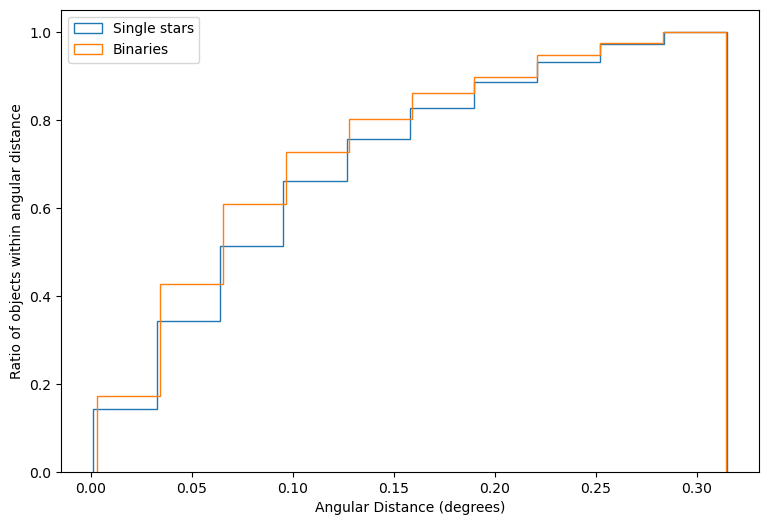

In [429]:
#plt.hist(radius, type=cumulative)
#merged_Frame['distance'].hist(cumulative=True)
from scipy.stats import ks_2samp
f,ax = plt.subplots(figsize=(9,6), facecolor='w')

single = merged_Frame_all['distance'].map(lambda x: x.value).hist(cumulative=True,histtype='step',bins=10, label="Single stars",density=True).get_children()[0].get_xy()
binary = merged_Frame['distance'].map(lambda x: x.value).hist(cumulative=True,histtype='step',bins=10, label='Binaries', density=True).get_children()[1].get_xy()

single = single[1:(len(single)-1),1]
binary = binary[1:(len(binary)-1),1]
res = ks_2samp(single,binary)
print(res)
plt.xlabel("Angular Distance (degrees)")
plt.ylabel("Ratio of objects within angular distance")
plt.grid(False)
plt.legend(loc=2)

In [430]:
# from astropy import units as u
# for i in merged_Frame_cut_all:
#     merged_Frame_cut_all['distance'] = np.sqrt((295.3250-merged_Frame_cut_all['ra'])**(2)+(40.19-merged_Frame_cut_all['dec'])**2)

In [431]:
# from astropy import units as u
# for i in merged_Frame_all:
#     merged_Frame_all['distance'] = np.sqrt((132.84-merged_Frame_all['ra'])**(2)+(40.19-merged_Frame_all['dec'])**2)

In [432]:
# from astropy import units as u
# for i in merged_Frame:
#     merged_Frame['distance'] = np.sqrt((132.84-merged_Frame['ra'])**(2)+(11.81-merged_Frame['dec'])**2)
# #for i in merged_Frame:
#     #a=SkyCoord(ra=132.84,dec=11.81,unit='deg')
#    # b=SkyCoord(ra=merged_Frame['ra'],dec=merged_Frame['dec'],unit='deg')
#    # merged_Frame['distance']=a.separation(b)
    
# merged_Frame

In [433]:
# from astropy import units as u
# for i in merged_Frame_cut:
#     merged_Frame_cut['distance'] = np.sqrt((132.84-merged_Frame_cut['ra'])**(2)+(11.81-merged_Frame_cut['dec'])**2)

In [434]:
merged_Frame_all

,G,G_BP,G_RP_x,ra,dec,id,G_RP_y,g_ps,r_ps,i_ps,...,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary,distance
0,19.0230,19.7317,18.2461,295.4074,39.8887,12710314146,18.2461,19.9350,19.1105,18.6645,...,-1,0.055764,-1,0.077030,0.050822,1.000000,0.000000,True,False,0.307833
1,17.7565,18.2715,17.0742,295.4750,39.9183,12502107216,17.0742,18.3646,17.7233,17.4640,...,-1,0.181715,-1,0.202926,0.118702,1.000000,0.000000,True,False,0.294963
2,16.0585,16.4154,15.5336,295.4897,39.9149,12621602491,15.5336,16.4768,16.0566,15.9051,...,-1,0.255996,-1,0.215876,0.128489,1.000000,0.000002,True,False,0.302611
3,17.9057,18.4525,17.2378,295.4602,39.9225,12379207806,17.2378,18.5763,17.8800,17.6278,...,-1,0.111930,-1,0.128634,0.086994,1.000000,0.000000,True,False,0.286819
4,15.6634,16.0011,15.1526,295.4608,39.9328,12240701847,15.1526,16.0665,15.6634,15.5208,...,-1,0.347363,-1,0.273711,0.142271,0.999895,0.008812,True,False,0.277406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,16.5085,16.8789,15.9718,295.1041,40.2338,11044803343,15.9718,16.9351,16.4970,16.3330,...,-1,0.146018,-1,0.132467,0.090774,1.000000,0.000000,True,False,0.174286
1210,17.2746,17.7109,16.6887,295.0730,40.2106,11232305474,16.6887,17.7853,17.2474,17.0424,...,-1,0.107229,-1,0.110538,0.076790,0.999992,0.000085,True,False,0.193575
1211,16.8210,17.2316,16.2510,295.0719,40.2356,11288004079,16.2510,17.2982,16.7978,16.6236,...,-1,0.151630,-1,0.144865,0.098138,0.995952,0.019321,True,False,0.198586
1212,17.0187,17.4358,16.4461,295.1099,40.2546,11066004668,16.4461,17.5094,16.9942,16.8069,...,-1,0.100595,-1,0.099406,0.070983,1.000000,0.000000,True,False,0.176486


Text(0.5, 0, 'Primary mass(M1)')

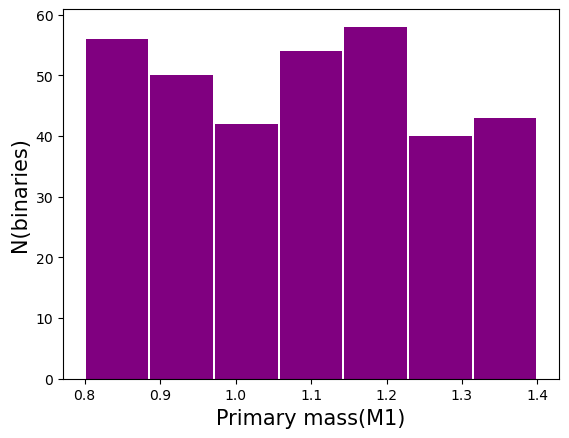

In [435]:
counts1, bins1, bars1 = plt.hist(merged_Frame['m1Mean'],bins=np.linspace(0.8, 1.4, 8), linewidth=2,color='purple',rwidth=0.97)
plt.ylabel('N(binaries)',fontsize=15)
plt.xlabel('Primary mass(M1)',fontsize=15)

Text(0.5, 0, 'Primary mass(M1)')

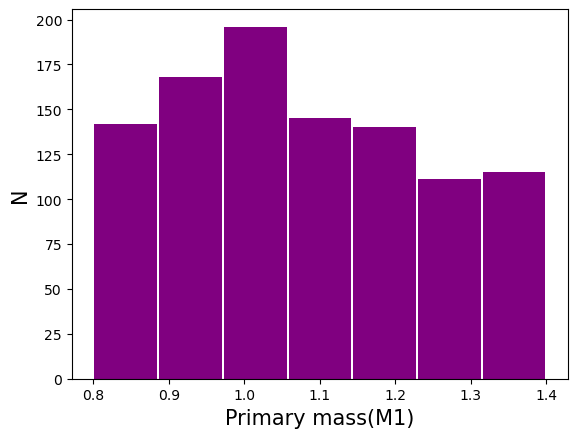

In [436]:
counts2, bins2, bars2 = plt.hist(merged_Frame_all['m1Mean'],bins=np.linspace(0.8, 1.4, 8),linewidth=2,color='purple',rwidth=0.97)
plt.ylabel('N',fontsize=15)
plt.xlabel('Primary mass(M1)',fontsize=15)

In [437]:
errors_y3 = np.sqrt(counts1)/counts2


errors_y3 = np.sqrt(counts1)/counts2

In [438]:
print(bins1)
print(bins1 + (bins1[1]-bins1[0])/2 )
print(bins1[1]-bins1[0],bins1[2]-bins1[1])

print(len(bins1), len(counts1/counts2))

[0.8        0.88571429 0.97142857 1.05714286 1.14285714 1.22857143
 1.31428571 1.4       ]
[0.84285714 0.92857143 1.01428571 1.1        1.18571429 1.27142857
 1.35714286 1.44285714]
0.08571428571428574 0.08571428571428563
8 7


[0.8        0.88571429 0.97142857 1.05714286 1.14285714 1.22857143
 1.31428571 1.4       ] [0.8        0.88571429 0.97142857 1.05714286 1.14285714 1.22857143
 1.31428571 1.4       ]


Text(0.5, 0, 'primary mass')

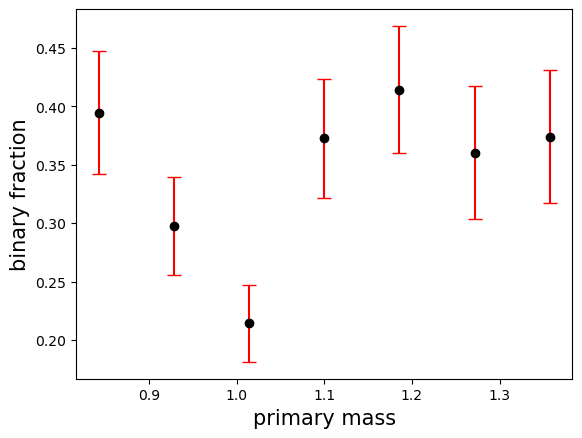

In [439]:
print(bins1,bins2)
primarybins = bins1[:-1] + (bins1[1]-bins1[0])/2

plt.errorbar(primarybins, counts1/counts2, xerr=None, yerr=errors_y3, fmt='o',capsize=5, color='black', ecolor='red')
plt.ylabel('binary fraction',fontsize=15)
plt.xlabel('primary mass',fontsize=15)

In [440]:
counts2

array([142., 168., 196., 145., 140., 111., 115.])

Text(0, 0.5, 'primary mass')

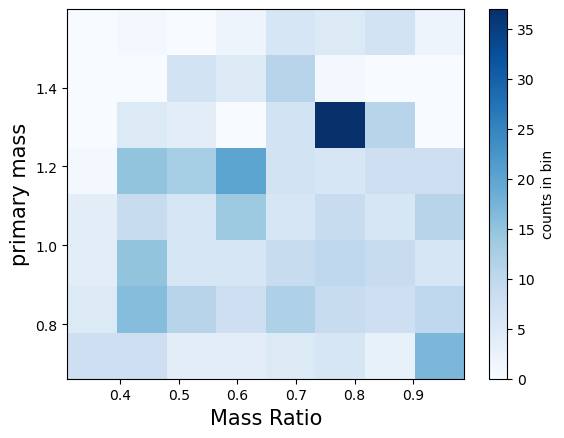

In [441]:
plt.hist2d(merged_Frame['qMean'], merged_Frame['m1Mean'], bins=8, cmap='Blues')
cb = plt.colorbar(label='counts in bin')
plt.xlabel('Mass Ratio',fontsize=15)
plt.ylabel('primary mass',fontsize=15)

Text(0, 0.5, 'distance')

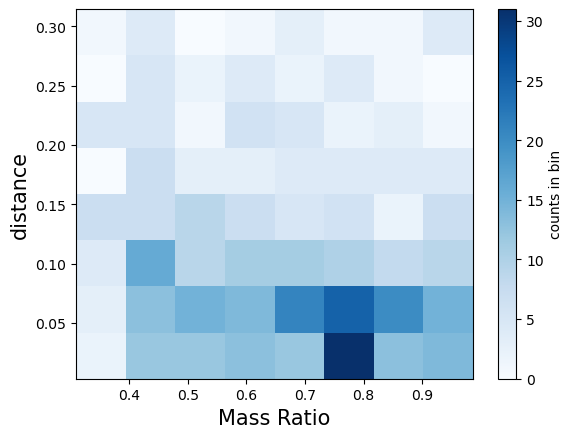

In [442]:
#qmean and distance
plt.hist2d(merged_Frame['qMean'], merged_Frame['distance'], bins=8, cmap='Blues')
cb = plt.colorbar(label='counts in bin')
plt.xlabel('Mass Ratio',fontsize=15)
plt.ylabel('distance',fontsize=15)

Text(0, 0.5, 'N (binaries)')

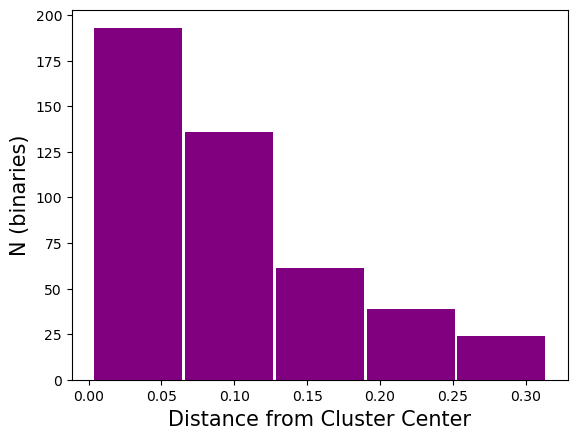

In [443]:
counts, bins, bars =plt.hist(merged_Frame['distance'], bins=5,linewidth=2,color='purple',rwidth=0.97)
plt.xlabel('Distance from Cluster Center',fontsize=15)
plt.ylabel('N (binaries)',fontsize=15)

Text(0, 0.5, 'N')

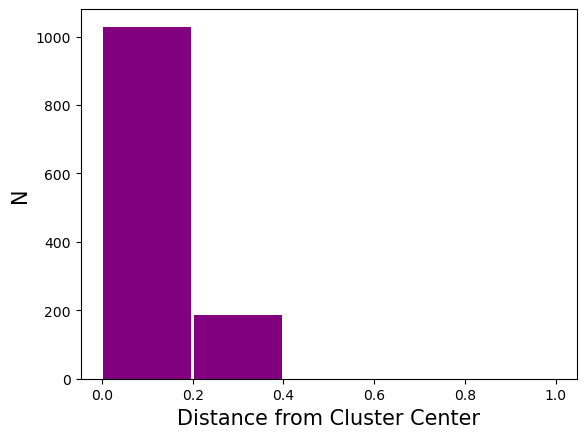

In [444]:
counts2, bins2, bars2 = plt.hist(merged_Frame_all['distance'], bins=5, range=[0,1],linewidth=2,color='purple',rwidth=0.97)
plt.xlabel('Distance from Cluster Center',fontsize=15)
plt.ylabel('N',fontsize=15)

In [445]:
bins

array([0.00309573, 0.06535558, 0.12761543, 0.18987528, 0.25213514,
       0.31439499])

In [446]:
# is this the right way to do error? can we factor in the std of the values themselves?
errors_y = np.sqrt(counts)/counts2


/var/folders/_w/2tvx5cms23s29hpbx7ncw_cr0000gn/T/ipykernel_17773/847706480.py:2: RuntimeWarning: divide by zero encountered in divide
  errors_y = np.sqrt(counts)/counts2


/var/folders/_w/2tvx5cms23s29hpbx7ncw_cr0000gn/T/ipykernel_17773/3076053262.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(bins3, counts/counts2, color='blue')


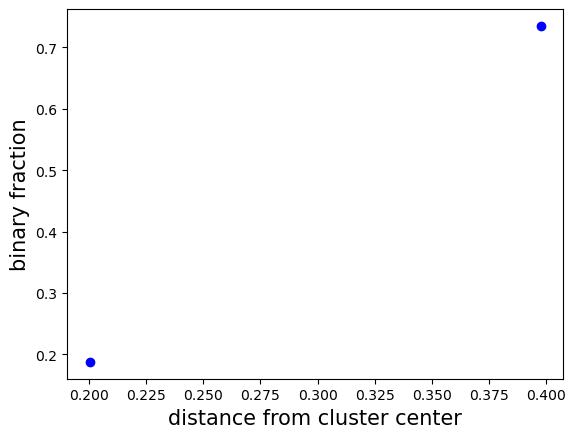

In [447]:
bins3 = [ 0.20038481, 0.39769111, 0.5949974 , 0.79230369,
       0.98960999 ]

plt.xlabel('distance from cluster center',fontsize=15)
plt.ylabel('binary fraction',fontsize=15)
plt.scatter(bins3, counts/counts2, color='blue')

/var/folders/_w/2tvx5cms23s29hpbx7ncw_cr0000gn/T/ipykernel_17773/2229133871.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.errorbar(bins3, counts/counts2, xerr=None, yerr=errors_y, fmt='o',capsize=5, color='black', ecolor='red')
/Users/Claire/opt/anaconda3/envs/BASE9/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3593: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


<ErrorbarContainer object of 3 artists>

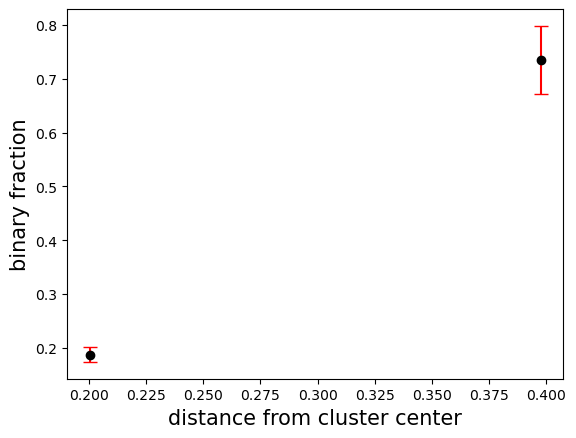

In [448]:
plt.xlabel('distance from cluster center',fontsize=15)
plt.ylabel('binary fraction',fontsize=15)
plt.errorbar(bins3, counts/counts2, xerr=None, yerr=errors_y, fmt='o',capsize=5, color='black', ecolor='red')


## plots of Only the center of CMD  13-17

Text(0.5, 0, 'Primary mass(M1) cut')

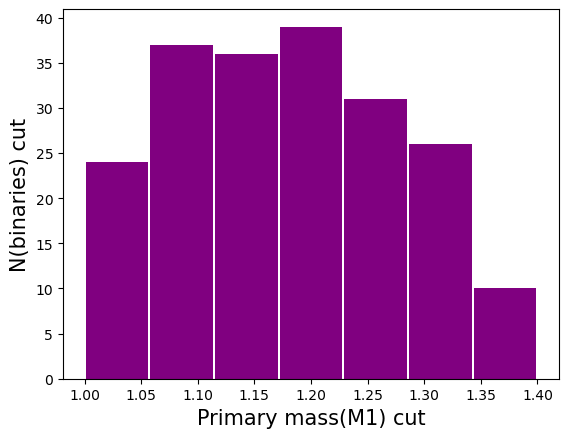

In [449]:
counts5, bins5, bars5 = plt.hist(merged_Frame_cut['m1Mean'],bins=np.linspace(1,1.4, 8), linewidth=2,color='purple',rwidth=0.97)
plt.ylabel('N(binaries) cut',fontsize=15)
plt.xlabel('Primary mass(M1) cut',fontsize=15)

In [450]:
bins5

array([1.        , 1.05714286, 1.11428571, 1.17142857, 1.22857143,
       1.28571429, 1.34285714, 1.4       ])

Text(0.5, 0, 'Primary mass(M1) cut')

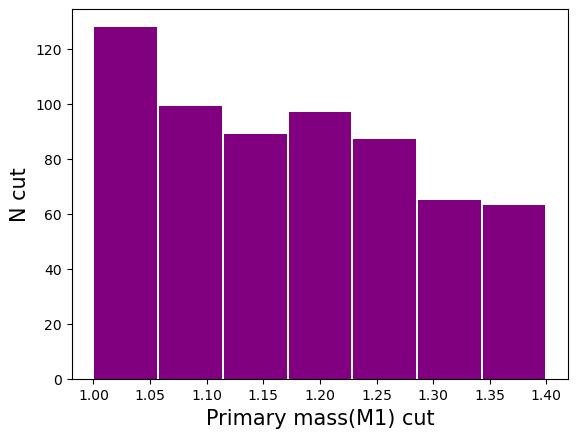

In [451]:
counts6, bins6, bars6 = plt.hist(merged_Frame_cut_all['m1Mean'],bins=np.linspace(1,1.4, 8),linewidth=2,color='purple',rwidth=0.97)
plt.ylabel('N cut',fontsize=15)
plt.xlabel('Primary mass(M1) cut',fontsize=15)

In [452]:
bins6

array([1.        , 1.05714286, 1.11428571, 1.17142857, 1.22857143,
       1.28571429, 1.34285714, 1.4       ])

Text(0.5, 0, 'primary mass cut')

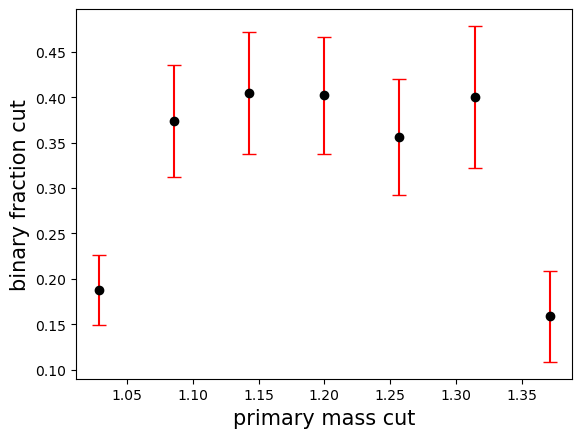

In [453]:
# the arrays arent the same size. should i be getting rid of the first bin value or last?
primarybins2 = bins5[:-1] + (bins5[1]-bins5[0])/2
errors_y4 = np.sqrt(counts5)/counts6
plt.errorbar(primarybins2, counts5/counts6, xerr=None, yerr=errors_y4, fmt='o',capsize=5, color='black', ecolor='red')
plt.ylabel('binary fraction cut',fontsize=15)
plt.xlabel('primary mass cut',fontsize=15)

Text(0, 0.5, 'primary mass cut')

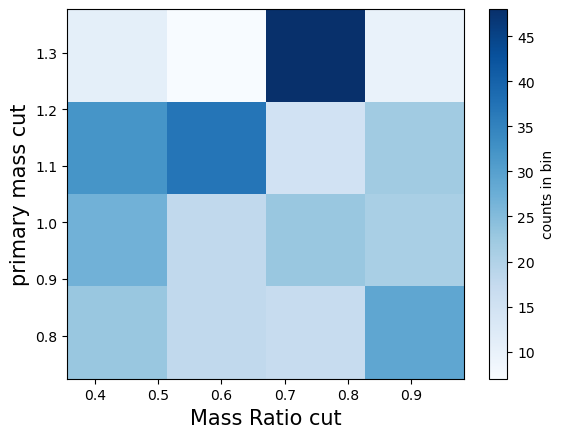

In [454]:
plt.hist2d(merged_Frame_cut['qMean'], merged_Frame_cut['m1Mean'], bins=4, cmap='Blues')
cb = plt.colorbar(label='counts in bin')
plt.xlabel('Mass Ratio cut',fontsize=15)
plt.ylabel('primary mass cut',fontsize=15)

Text(0, 0.5, 'distance cut')

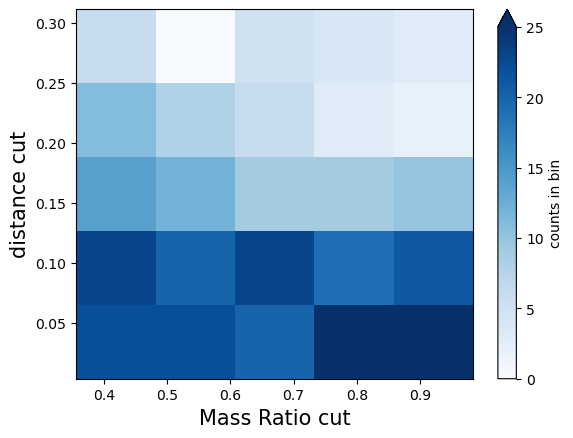

In [455]:
#qmean and distance
plt.hist2d(merged_Frame_cut['qMean'], merged_Frame_cut['distance'], bins=5, cmap='Blues', vmax=25)
cb2 = plt.colorbar(extend="max",label='counts in bin')
plt.xlabel('Mass Ratio cut',fontsize=15)
plt.ylabel('distance cut',fontsize=15)

Text(0, 0.5, 'N (binaries) cut')

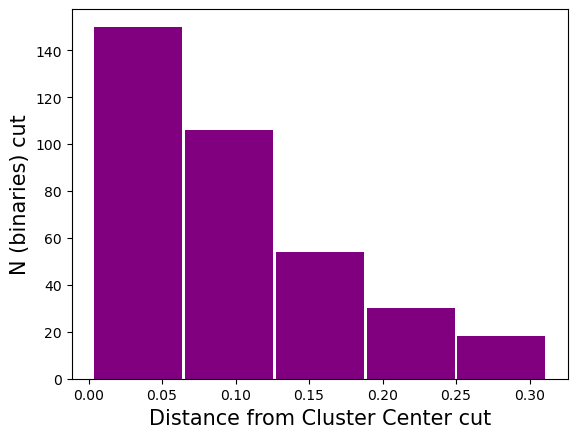

In [456]:
counts7, bins7, bars7 =plt.hist(merged_Frame_cut['distance'], bins=5,linewidth=2,color='purple',rwidth=0.97)
plt.xlabel('Distance from Cluster Center cut',fontsize=15)
plt.ylabel('N (binaries) cut',fontsize=15)

Text(0, 0.5, 'N cut')

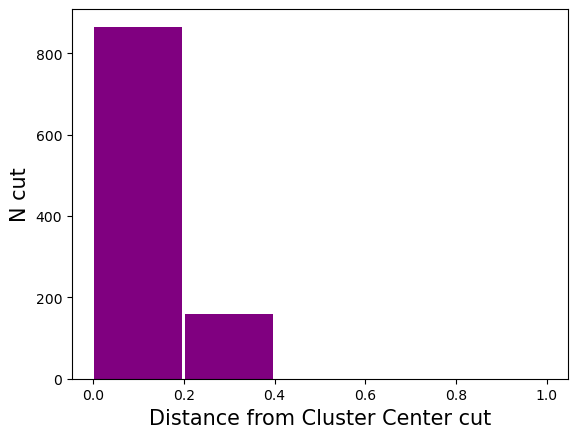

In [457]:
counts8, bins8, bars8 = plt.hist(merged_Frame_cut_all['distance'], bins=5, range=[0,1],linewidth=2,color='purple',rwidth=0.97)
plt.xlabel('Distance from Cluster Center cut',fontsize=15)
plt.ylabel('N cut',fontsize=15)

In [458]:

bins7 = [0.2,0.4,0.6,0.8,1]
bins8 = [0,0.2,0.4,0.6,0.8,1]
bins7 

[0.2, 0.4, 0.6, 0.8, 1]

In [459]:
# is this the right way to do error? can we factor in the std of the values themselves?
errors_y2 = np.sqrt(counts7)/counts8


/var/folders/_w/2tvx5cms23s29hpbx7ncw_cr0000gn/T/ipykernel_17773/2702057577.py:2: RuntimeWarning: divide by zero encountered in divide
  errors_y2 = np.sqrt(counts7)/counts8


/var/folders/_w/2tvx5cms23s29hpbx7ncw_cr0000gn/T/ipykernel_17773/802050085.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.errorbar(bins8, counts7/counts8, xerr=None, yerr=errors_y2, fmt='o',capsize=5, color='black', ecolor='red')


ValueError: 'x' and 'y' must have the same size

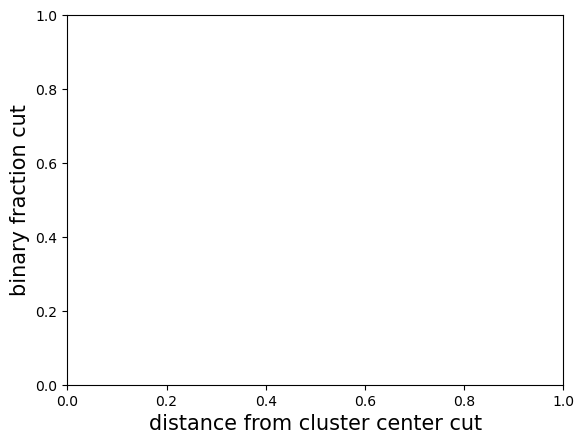

In [460]:
plt.xlabel('distance from cluster center cut',fontsize=15)
plt.ylabel('binary fraction cut',fontsize=15)
plt.errorbar(bins8, counts7/counts8, xerr=None, yerr=errors_y2, fmt='o',capsize=5, color='black', ecolor='red')


In [ ]:
merged_Frame_cut.columns

Index(['G', 'G_BP', 'G_RP_x', 'ra', 'dec', 'G_RP_y', 'qMean', 'qStd', 'm1Mean',
       'm2Mean', 'distance'],
      dtype='object')

(23.0, 12.0)

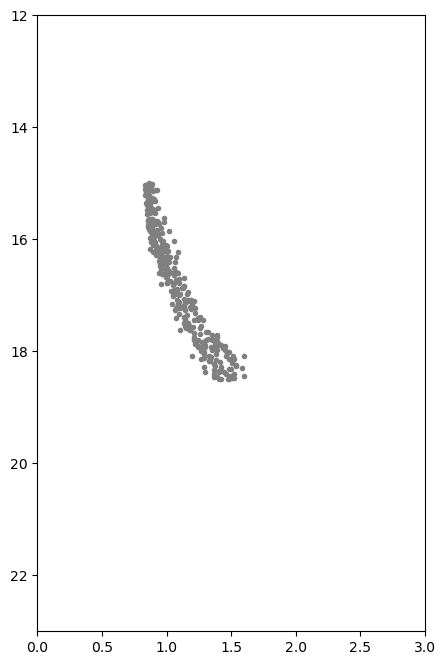

In [ ]:
f, ax = plt.subplots(figsize=(5,8))
ax.plot(merged_Frame_cut['G_BP'] - merged_Frame_cut['G_RP_x'], merged_Frame_cut['G'],'.', color='gray')
ax.set_xlim(0, 3)
ax.set_ylim(23, 12)

(23.0, 12.0)

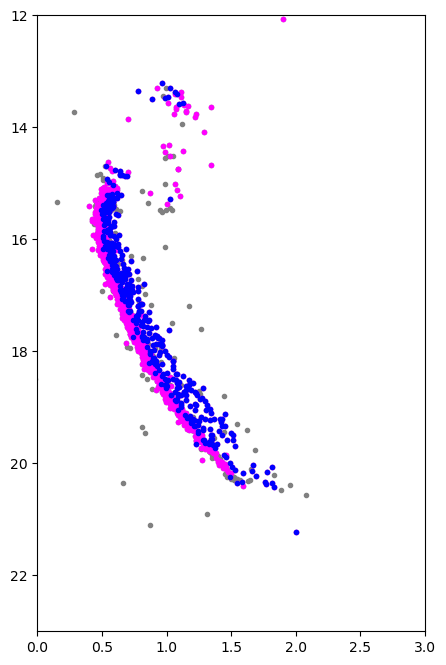

In [ ]:
f, ax = plt.subplots(figsize=(5,8))
photMems = phot.loc[phot['member']]
photBinary = phot.loc[phot['binary']]
ax.plot(phot['g_ps'] - phot['i_ps'], phot['g_ps'],'.', color='gray')
ax.plot(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],'.', color='magenta')
ax.plot(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'],'.', color='blue')
ax.set_xlim(0, 3)
ax.set_ylim(23, 12)

In [ ]:
photBinary

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
18,10079200118,12.5085,13.0806,11.7925,99.9000,99.9000,99.9000,99.9000,99.9000,10.843,...,1.587656,-1,1.543199,-1,0.972027,0.052500,0.995932,6.365169e-02,True,True
19,10014000119,12.5173,13.1115,11.7863,13.3066,12.6870,12.2810,12.0270,11.9090,10.790,...,1.595815,-1,1.452335,-1,0.910220,0.182120,0.944925,2.280457e-01,True,True
20,10291800122,12.5621,13.1809,11.8130,13.3745,12.7150,12.3100,12.0640,11.9320,10.804,...,1.598595,-1,1.277282,-1,0.799065,0.166017,0.999998,3.616864e-05,True,True
21,10320700125,12.5894,13.1961,11.8481,13.3969,12.7100,12.3140,12.0760,11.9540,10.844,...,1.594874,-1,1.401906,-1,0.879090,0.047201,0.998533,3.405517e-02,True,True
22,10276600132,12.6390,13.2478,11.8866,13.3457,13.0830,12.5690,12.2340,12.0017,10.867,...,1.597176,-1,1.316464,-1,0.824260,0.047268,0.999882,2.579837e-03,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,10588715865,19.2640,19.9550,18.4009,20.2450,19.1709,18.7523,99.9000,18.1414,99.900,...,0.705049,-1,0.343375,-1,0.487273,0.092093,1.000000,0.000000e+00,True,True
1879,11196416068,19.2877,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,16.319,...,0.641565,-1,0.624274,-1,0.973296,0.023495,0.998745,1.297811e-02,True,True
1880,10006017074,19.4167,99.9000,99.9000,99.9000,99.9000,18.6213,99.9000,99.9000,99.900,...,0.635973,-1,0.619667,-1,0.974574,0.021689,1.000000,0.000000e+00,True,True
1883,11717518632,19.6066,99.9000,99.9000,99.9000,19.6921,18.1839,18.7557,18.6017,99.900,...,0.655270,-1,0.448548,-1,0.686959,0.124208,1.000000,5.665158e-08,True,True


In [ ]:
photBinary

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
18,10079200118,12.5085,13.0806,11.7925,99.9000,99.9000,99.9000,99.9000,99.9000,10.843,...,1.587656,-1,1.543199,-1,0.972027,0.052500,0.995932,6.365169e-02,True,True
19,10014000119,12.5173,13.1115,11.7863,13.3066,12.6870,12.2810,12.0270,11.9090,10.790,...,1.595815,-1,1.452335,-1,0.910220,0.182120,0.944925,2.280457e-01,True,True
20,10291800122,12.5621,13.1809,11.8130,13.3745,12.7150,12.3100,12.0640,11.9320,10.804,...,1.598595,-1,1.277282,-1,0.799065,0.166017,0.999998,3.616864e-05,True,True
21,10320700125,12.5894,13.1961,11.8481,13.3969,12.7100,12.3140,12.0760,11.9540,10.844,...,1.594874,-1,1.401906,-1,0.879090,0.047201,0.998533,3.405517e-02,True,True
22,10276600132,12.6390,13.2478,11.8866,13.3457,13.0830,12.5690,12.2340,12.0017,10.867,...,1.597176,-1,1.316464,-1,0.824260,0.047268,0.999882,2.579837e-03,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,10588715865,19.2640,19.9550,18.4009,20.2450,19.1709,18.7523,99.9000,18.1414,99.900,...,0.705049,-1,0.343375,-1,0.487273,0.092093,1.000000,0.000000e+00,True,True
1879,11196416068,19.2877,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,16.319,...,0.641565,-1,0.624274,-1,0.973296,0.023495,0.998745,1.297811e-02,True,True
1880,10006017074,19.4167,99.9000,99.9000,99.9000,99.9000,18.6213,99.9000,99.9000,99.900,...,0.635973,-1,0.619667,-1,0.974574,0.021689,1.000000,0.000000e+00,True,True
1883,11717518632,19.6066,99.9000,99.9000,99.9000,19.6921,18.1839,18.7557,18.6017,99.900,...,0.655270,-1,0.448548,-1,0.686959,0.124208,1.000000,5.665158e-08,True,True


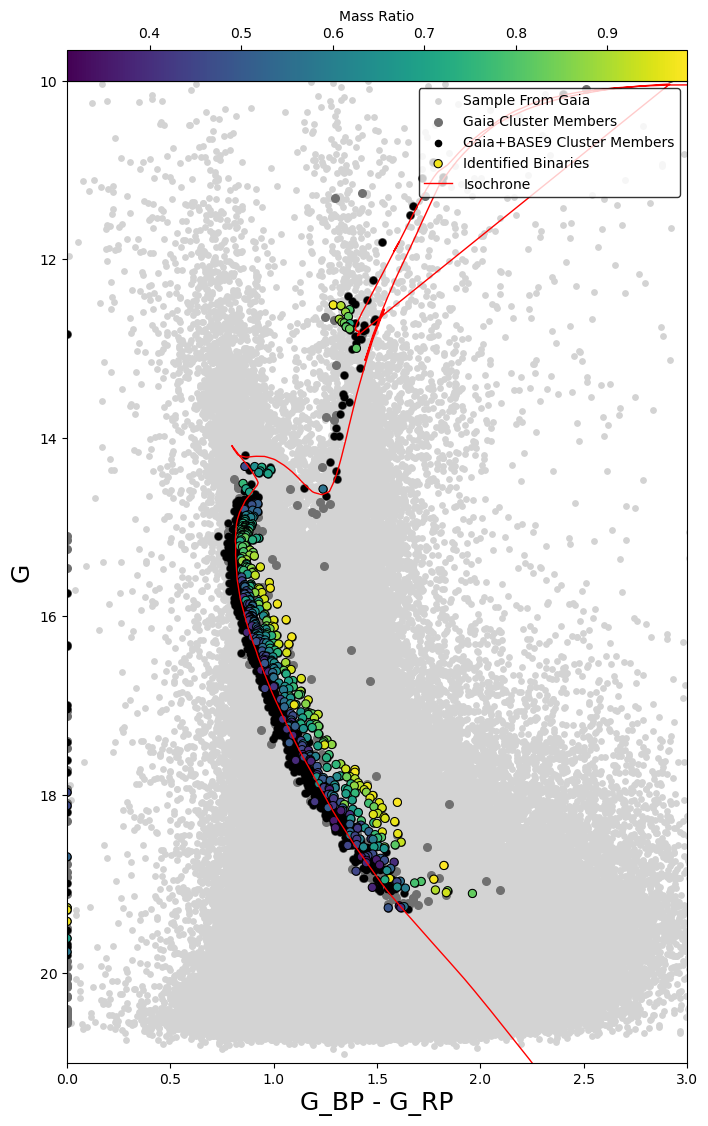

In [ ]:
r = photBinary['qMean']
f, ax = plt.subplots(figsize=(8,15))

ax.set_xlabel('G_BP - G_RP',fontsize=18)
ax.set_ylabel('G',fontsize=18)
#plot phot and cluster members
plt.scatter(originalGaia['phot_bp_mean_mag'] - originalGaia['phot_rp_mean_mag'], originalGaia['phot_g_mean_mag'],s=15, color='lightgray',label='Sample From Gaia')
plt.scatter(phot['G_BP'] - phot['G_RP'], phot['G'],s=30, color='#707070',label='Gaia Cluster Members')
plt.scatter(photMems['G_BP'] - photMems['G_RP'], photMems['G'],s=20, color='#000000',label='Gaia+BASE9 Cluster Members')
#plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], color='#000000')
ax.set_xlim(0, 3)
ax.set_ylim(21,10)


#plot colorbar
plt.scatter(photBinary['G_BP'] - photBinary['G_RP'], photBinary['G'], s=35, c=r, cmap=plt.cm.get_cmap("viridis"),edgecolors= "black",linewidth=0.75,label='Identified Binaries')

plt.colorbar(label="Mass Ratio", orientation="horizontal",pad=0,location='top')


#overplot isochrone
photfile = ph
cmdfile = r"/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/NGC6819.ms"
mag       = 'G'
color     = 'G_BP-G_RP'.split('-')
header   = np.loadtxt(cmdfile,max_rows=1,dtype=str)
yplot     = np.where(header == mag)[0][0]
color1    = np.where(header == color[0])[0][0]
color2    = np.where(header == color[1])[0][0]
data = np.loadtxt(cmdfile,skiprows=1)
ymag    = data[:,yplot]
color   = data[:,color1] - data[:,color2]
plt.plot(color, ymag, color='red',linewidth=1,label='Isochrone')
plt.legend(loc="upper right",edgecolor='black')
#plt.show()
plt.savefig('MegaCMD1.png',dpi=300, bbox_inches="tight")
    


Text(0, 0.5, 'N')

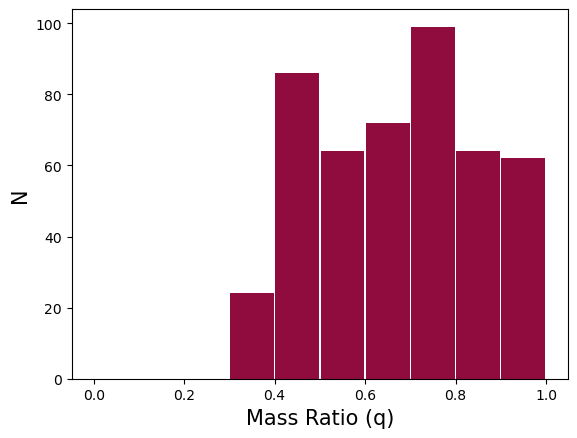

In [ ]:
f, ax = plt.subplots()
photBinary = phot.loc[phot['binary']]
_ = ax.hist(photBinary['qMean'], bins=10, range=[0,1],linewidth=2,color='#900C3F',rwidth=0.97)
ax.set_xlabel('Mass Ratio (q)',fontsize=15)
ax.set_ylabel('N',fontsize=15)
#plt.savefig('M67qhist1.png',dpi=300, bbox_inches="tight")

(21.0, 10.0)

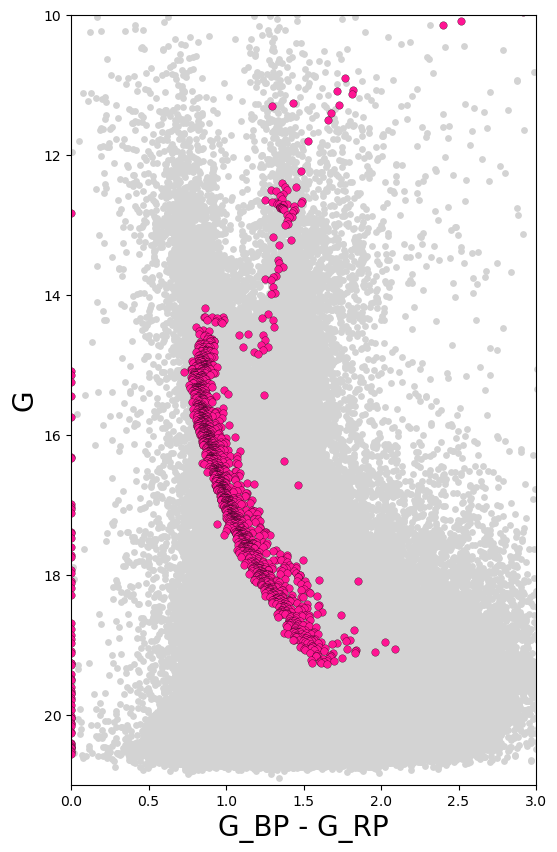

In [ ]:
f, ax = plt.subplots(figsize=(6,10))

ax.set_xlabel('G_BP - G_RP',fontsize=20)
ax.set_ylabel('G',fontsize=20)
#plot phot and cluster members
plt.scatter(M67.data['phot_bp_mean_mag'] - M67.data['phot_rp_mean_mag'], M67.data['phot_g_mean_mag'],s=15, color='lightgray',label='Sample From Gaia')
plt.scatter(phot['G_BP'] - phot['G_RP'], phot['G'],s=30, color='Deeppink',label='Gaia Cluster Members', edgecolors= "black",linewidth=0.2)
ax.set_xlim(0, 3)
ax.set_ylim(21,10)
#plt.savefig('M67cmd.png', bbox='tight',dpi=300)